<h2 style="color: #FFD700; background-color: #2C3E50; font-size: 24px; padding: 15px;">Partie Analytique</h2>


In [2]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1" # évite le memory leak

In [3]:
df_acp = pd.read_csv("df_acp.csv")
df_pays = pd.read_csv("pays.csv")

In [4]:
df_acp.head()

Proteines_volaille  Importations_volaille  Exportations_volaille  \
0                0.54                   29.0                    0.0   
1               14.11                  514.0                   63.0   
2                6.26                   38.0                    0.0   
3                1.97                    2.0                    0.0   
4                7.96                  842.0                  646.0   

   Kcal_total  Population_2017  Liberte_commerciale  Stabilite_politique  \
0      1997.0        36296.113            66.676911            -0.393806   
1      2987.0        57009.756            68.400000            -0.284804   
2      3400.0         2884.169            83.400000             0.373771   
3      3345.0        41389.189            57.400000            -0.919614   
4      3559.0        82658.409            79.600000             0.574381   

    PIB_hab_PPA  Ratio_import_export     PIB_total  Ratio_proteines_kcal  
0   2335.795862            29.000000  8.478031e+07              0.000270  
1  13738.438585             8.031250  7.832250e+08              0.004722  
2  12771.003793            38.000000  3.683373e+07              0.001841  
3  13493.560749             2.000000  5.584875e+08              0.000589  
4  54110.253665             1.301391  4.472667e+09              0.002236

In [5]:
df_pays.head()

Zone
0     Afghanistan
1  Afrique du Sud
2         Albanie
3         Algérie
4       Allemagne

In [6]:
# Rattacher les noms de pays
df_acp["Zone"] = df_pays["Zone"]


<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">1. Analyse ACP</strong></h2>

<h2 style="color: #FFFFFF; background-color: #008080; padding: 10px;">1.1 Centrage et réduction (standardisation)</h2>




In [9]:
# objectif : Cette étape consiste à transformer chaque variable pour qu’elle ait :
# une moyenne = 0
# un écart-type = 1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Standardisation des données

scaler = StandardScaler()
X_std = scaler.fit_transform(df_acp.drop(columns="Zone")) #-----> var numerique uniquement 

In [12]:
# reconstruire un DataFrame propre

X_std_df = pd.DataFrame(X_std, columns=df_acp.drop(columns="Zone").columns)

In [13]:
X_std_df.describe().T


count          mean       std       min       25%  \
Proteines_volaille     191.0 -7.440238e-17  1.002628 -1.013331 -0.878898   
Importations_volaille  191.0 -9.300298e-18  1.002628 -0.424644 -0.424644   
Exportations_volaille  191.0 -6.975223e-18  1.002628 -0.203594 -0.203594   
Kcal_total             191.0 -6.510208e-17  1.002628 -2.048697 -0.107544   
Population_2017        191.0 -2.790089e-17  1.002628 -0.256863 -0.248608   
Liberte_commerciale    191.0  2.790089e-17  1.002628 -3.721858 -0.564995   
Stabilite_politique    191.0  4.650149e-18  1.002628 -3.146258 -0.554020   
PIB_hab_PPA            191.0 -8.370268e-17  1.002628 -1.003142 -0.785917   
Ratio_import_export    191.0  9.300298e-18  1.002628 -0.316192 -0.316192   
PIB_total              191.0  9.300298e-18  1.002628 -0.275530 -0.265952   
Ratio_proteines_kcal   191.0  6.510208e-17  1.002628 -1.022094 -0.858147   

                            50%       75%       max  
Proteines_volaille    -0.215578  0.597210  3.916463  
Importations_volaille -0.368333 -0.105547  6.263881  
Exportations_volaille -0.203594 -0.186242  9.566583  
Kcal_total             0.300507  0.693478  1.200203  
Population_2017       -0.209735 -0.098708  9.510448  
Liberte_commerciale   -0.014715  0.948179  2.801750  
Stabilite_politique   -0.140841  0.649138  2.989163  
PIB_hab_PPA           -0.325735  0.365351  4.509832  
Ratio_import_export   -0.279589 -0.140433  9.124544  
PIB_total             -0.235001 -0.135093  9.098421  
Ratio_proteines_kcal  -0.134889  0.499379  3.493781

In [14]:
from sklearn.decomposition import PCA

In [15]:
# Application de l’ACP
pca = PCA()
X_pca = pca.fit_transform(X_std)

<h2 style="color: #FFFFFF; background-color: #008080; padding: 10px;">1.2 Éboulis des valeurs propres (Scree Plot) (standardisation)</h2>

In [17]:
import matplotlib.pyplot as plt
import numpy as np

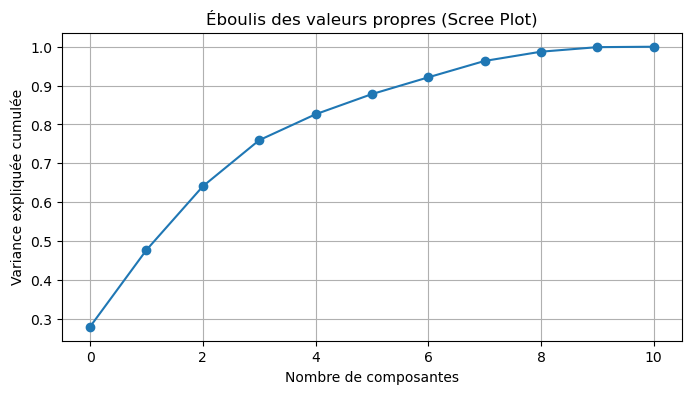

In [18]:
explained_variance = pca.explained_variance_ratio_  # Liste des % de variance expliquée par chaque composante

# scree plot
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Éboulis des valeurs propres (Scree Plot)")
plt.grid(True)
plt.show()


In [19]:
# On cherche le "coude" → là où la courbe commence à stagner (les nouvelles composantes ajoutent peu d’info).
# On voit clairement que les 4 premières composantes expliquent l’essentiel de la variance (83%)

<h2 style="color: #FFFFFF; background-color: #008080; padding: 10px;">1.3 Visualisation du cercle des corrélations</h2>

In [21]:
# Matrice des composantes principales (vecteurs propres)
pcs = pca.components_

In [22]:
#  DataFrame avec les coordonnées des variables sur les deux premiers axes

df_corr = pd.DataFrame(
    pcs[:2],  # on prend les deux premiers axes (ligne 0 et 1)
    columns=X_std_df.columns,  # noms des 11 variables d’origine
    index=["F1", "F2"]  # noms des axes
).T  # Transposé pour que chaque ligne soit une variable


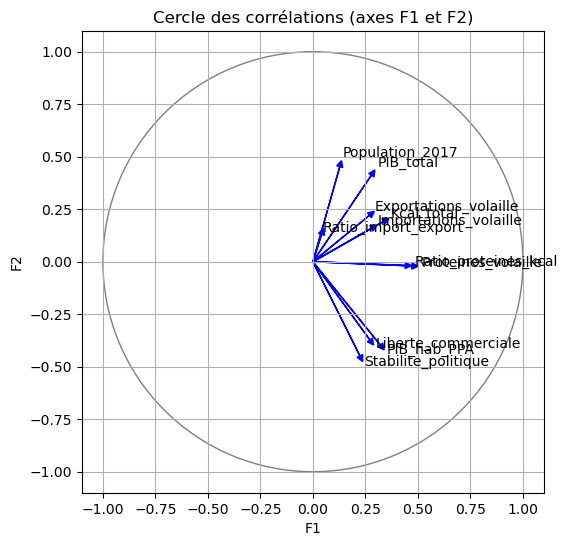

In [23]:
# cercle des corrélations


plt.figure(figsize=(6, 6))

# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False) # créer un cercle unité (rayon 1)
plt.gca().add_artist(circle)  # l’ajouter à la figure

# Flèches pour chaque variable
for variable in df_corr.index:
    x = df_corr.loc[variable, "F1"] # coordonnée sur F1 (axe horizontal)
    y = df_corr.loc[variable, "F2"] # coordonnée sur F2 (axe vertical)
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='blue') # flèche depuis (0, 0)
    plt.text(x * 1.1, y * 1.1, variable, fontsize=10) # nom de la variable légèrement à côté


plt.xlim(-1.1, 1.1) # axe x entre -1.1 et 1.1
plt.ylim(-1.1, 1.1) # axe y entre -1.1 et 1.1
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Cercle des corrélations (axes F1 et F2)")
plt.grid()
plt.gca().set_aspect('equal')  # pour que le cercle soit rond
plt.show()


In [24]:
#  Interprétation

# Plus une variable est proche du bord du cercle, plus elle est bien représentée par les deux axes.
# Si deux flèches sont proches → les variables sont corrélées.
# Si deux flèches sont opposées → les variables sont inversément corrélées.
# Si une flèche est proche de l’axe horizontal → elle contribue fortement à F1.
# Si elle est proche de l’axe vertical → elle contribue à F2.

<h2 style="color: #FFFFFF; background-color: #008080; padding: 10px;">1.4 Projection des pays</h2>

In [26]:
# 1. Projeter les individus sur les composantes principales
X_projected = pca.transform(X_std)


In [27]:
# 2. Récupérer les noms des pays pour l’affichage
pays = df_acp["Zone"].values


In [28]:
pip install adjustText


Note: you may need to restart the kernel to use updated packages.


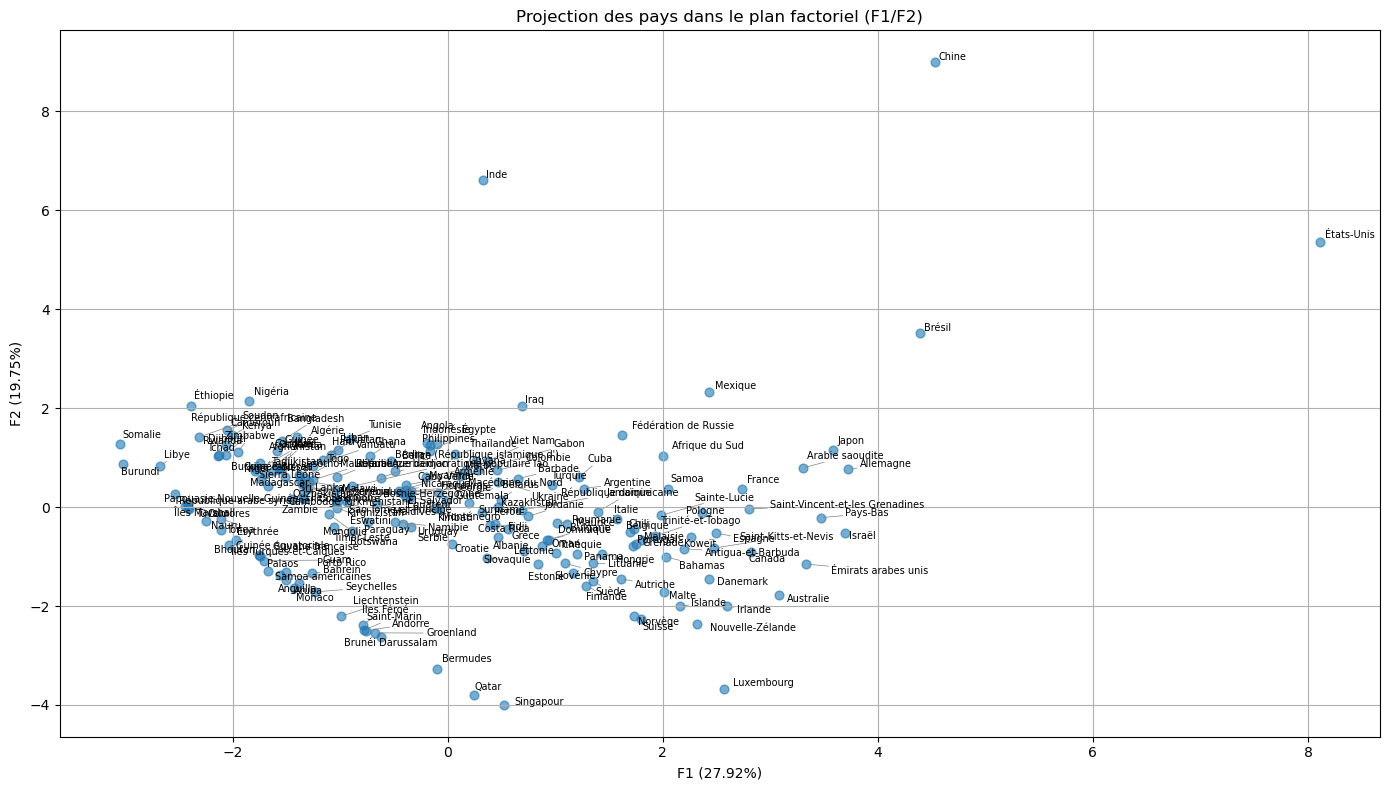

In [29]:
# 3. Affichage des individus projetés sur le plan F1 x F2

from adjustText import adjust_text

plt.figure(figsize=(14, 8))
plt.scatter(X_projected[:, 0], X_projected[:, 1], alpha=0.6, s=40)

texts = [plt.text(X_projected[i, 0], X_projected[i, 1], nom, fontsize=7) for i, nom in enumerate(pays)]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

plt.xlabel(f"F1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"F2 ({explained_variance[1]*100:.2f}%)")
plt.title("Projection des pays dans le plan factoriel (F1/F2)")
plt.grid(True)
plt.tight_layout()
plt.show()


<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">2. Clustering - CAH</strong></h2>

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage  # Pour construire et afficher le dendrogramme

In [32]:
# la CAH avec linkage
Z = linkage(X_projected[:, :2], method='ward')

# X_projected[:, :2] : on utilise ici les deux premières composantes de l’ACP (F1 et F2) car elles
# résument la majorité de la variance de tes données.
# method='ward' : méthode de regroupement qui minimise la variance intra-cluster.


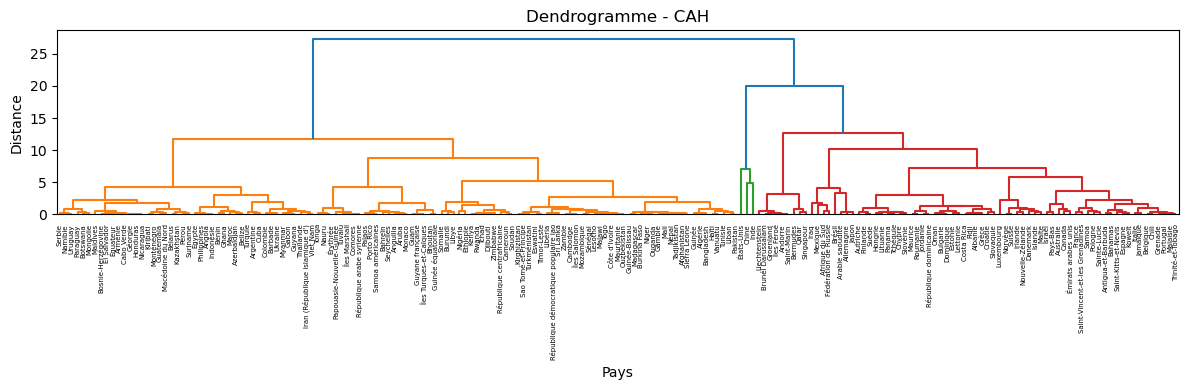

In [33]:
# dendrogramme (arborescence)

plt.figure(figsize=(12, 4))
dendrogram(Z, labels=pays, leaf_rotation=90)
plt.title("Dendrogramme - CAH")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [34]:
from scipy.cluster.hierarchy import fcluster # former des clusters à partir du dendrogramme


In [35]:
# Créer les groupes avec une hauteur de coupe à 12

groupes = fcluster(Z, t=12, criterion="distance") 

In [36]:
# les groupes de pays 

df_groupes = pd.DataFrame({"Pays": pays, "Groupe": groupes})
df_groupes.sort_values("Groupe")


Pays  Groupe
0    Afghanistan       1
112   Mozambique       1
113      Myanmar       1
114      Namibie       1
115        Nauru       1
..           ...     ...
48     Dominique       4
50       Espagne       4
51       Estonie       4
42    Costa Rica       4
132      Pologne       4

[191 rows x 2 columns]

In [37]:
# ex de groupe 2 
df_groupes[df_groupes["Groupe"] == 2]

Pays  Groupe
38        Chine       2
74         Inde       2
185  États-Unis       2

<h2 style="color: #000000; background-color: #FFFFFF; padding: 10px;">3. Clustering - K-means</strong></h2>

In [39]:
from sklearn.cluster import KMeans

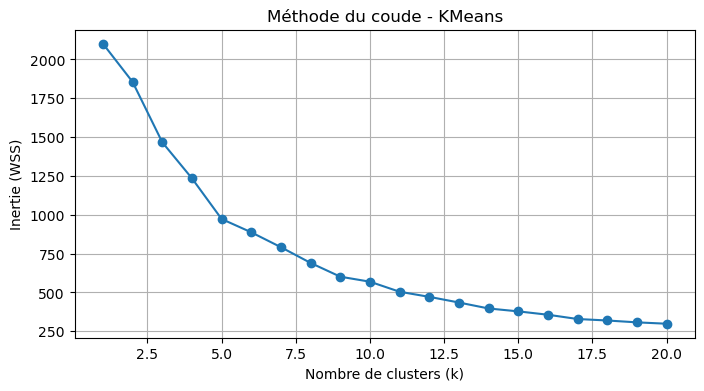

In [40]:
# methode du coude 

inertias = []
k_range = range(1, 21)

 # Calcul de l'inertie pour chaque k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertias.append(kmeans.inertia_)

# Tracer le coude
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')  # X et Y ont la même longueur
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (WSS)")
plt.title("Méthode du coude - KMeans")
plt.grid(True)
plt.show()


In [41]:
# L’inertie diminue fortement de k=1 à k=5
# Puis la courbe s’aplatit à partir de k ≈ 5
# Après ça, ajouter plus de clusters n’apporte que peu de gain
# Le "coude" visuel est autour de k = 5

In [42]:
kmeans_final = KMeans(n_clusters=5, random_state=42)

In [43]:
kmeans_final.fit(X_std)  

KMeans(n_clusters=5, random_state=42)

In [44]:
labels_kmeans = kmeans_final.labels_


In [45]:
df_kmeans = pd.DataFrame({"Pays": pays, "Groupe": labels_kmeans})


In [46]:
df_kmeans.sort_values("Groupe")

Pays  Groupe
83             Japon       0
44              Cuba       0
77              Iraq       0
178         Viet Nam       0
9    Arabie saoudite       0
..               ...     ...
50           Espagne       3
38             Chine       4
185       États-Unis       4
74              Inde       4
27            Brésil       4

[191 rows x 2 columns]

In [47]:
# afficher les pays groupe par groupe
for i in range(5):
    print(f"\n Groupe {i}")
    print(df_kmeans[df_kmeans["Groupe"] == i]["Pays"].values)



 Groupe 0
['Allemagne' 'Angola' 'Arabie saoudite' 'Cuba' 'Iraq' 'Japon' 'Mexique'
 'Viet Nam']

 Groupe 1
['Afghanistan' 'Algérie' 'Arménie' 'Azerbaïdjan' 'Bangladesh' 'Belize'
 'Bosnie-Herzégovine' 'Botswana' 'Burkina Faso' 'Burundi' 'Bénin'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Comores' "Côte d'Ivoire" 'Djibouti'
 'El Salvador' 'Eswatini' 'Gabon' 'Gambie' 'Ghana' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Guyana' 'Géorgie' 'Haïti' 'Honduras' 'Indonésie'
 "Iran (République islamique d')" 'Kenya' 'Kirghizistan' 'Kiribati'
 'Lesotho' 'Liban' 'Libye' 'Libéria' 'Macédoine du Nord' 'Madagascar'
 'Malawi' 'Maldives' 'Mali' 'Maroc' 'Mauritanie' 'Mongolie' 'Monténégro'
 'Mozambique' 'Myanmar' 'Namibie' 'Nauru' 'Nicaragua' 'Niger' 'Nigéria'
 'Népal' 'Ouganda' 'Ouzbékistan' 'Pakistan' 'Papouasie-Nouvelle-Guinée'
 'Paraguay' 'Philippines' 'Rwanda' 'République arabe syrienne'
 'République centrafricaine' 'République démocratique populaire lao'
 'Sao Tomé-et-Principe' 'Serbie' 'Sierra Leone' 'Somalie'

In [48]:
# Création d’un DataFrame combiné

df_comparaison = pd.DataFrame({
    "Pays": pays,
    "CAH": df_groupes["Groupe"].values,
    "KMeans": df_kmeans["Groupe"].values
})

# Tri par groupe KMeans
df_comparaison.sort_values(by="KMeans")


Pays  CAH  KMeans
83             Japon    4       0
44              Cuba    1       0
77              Iraq    4       0
178         Viet Nam    1       0
9    Arabie saoudite    4       0
..               ...  ...     ...
50           Espagne    4       3
38             Chine    2       4
185       États-Unis    2       4
74              Inde    2       4
27            Brésil    4       4

[191 rows x 3 columns]

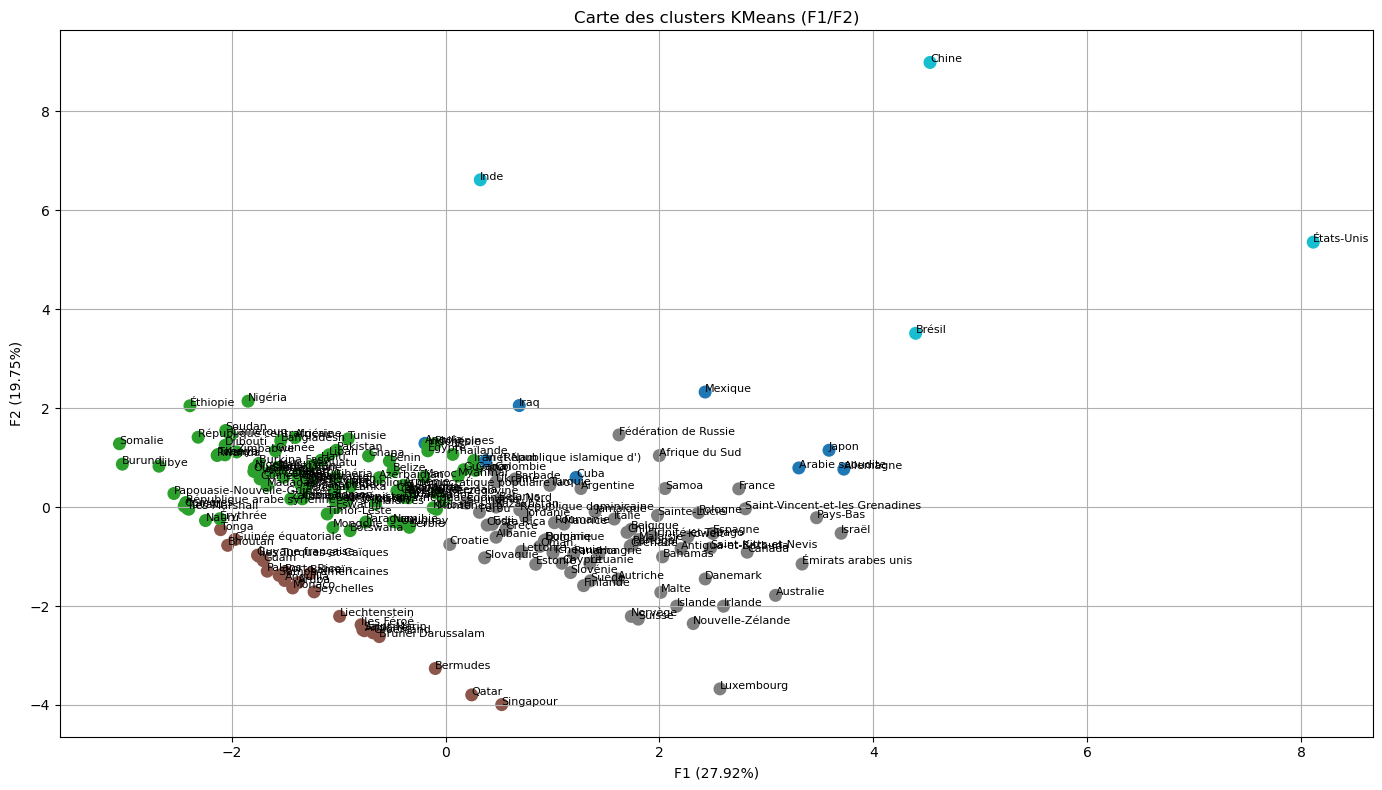

In [49]:
# Carte des clusters obtenus

plt.figure(figsize=(14, 8))

# Scatter avec couleurs selon les groupes KMeans
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=labels_kmeans, cmap='tab10', s=70)

#  nom des pays
for i, nom in enumerate(pays):
    plt.text(X_projected[i, 0], X_projected[i, 1], nom, fontsize=8)

plt.xlabel(f"F1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"F2 ({explained_variance[1]*100:.2f}%)")
plt.title("Carte des clusters KMeans (F1/F2)")
plt.grid(True)
plt.tight_layout()
plt.show()


<h2 style="color: #FFD700; background-color: #2C3E50; font-size: 24px; padding: 15px;">Recommandations stratégiques</h2>

<h2 style="color: #FFFFFF; background-color: #008080; padding: 10px;">1. Les groupes de pays les plus prometteurs</h2>

In [103]:
# Les pays de chaque cluster

df_acp["Pays"] = pays

df_acp["Cluster"] = labels_kmeans  

for i in sorted(df_acp["Cluster"].unique()):
    print(f"\nCluster {i} ({(df_acp['Cluster'] == i).sum()} pays) :")
    print(", ".join(df_acp[df_acp["Cluster"] == i]["Pays"].values))



Cluster 0 (8 pays) :
Allemagne, Angola, Arabie saoudite, Cuba, Iraq, Japon, Mexique, Viet Nam

Cluster 1 (90 pays) :
Afghanistan, Algérie, Arménie, Azerbaïdjan, Bangladesh, Belize, Bosnie-Herzégovine, Botswana, Burkina Faso, Burundi, Bénin, Cabo Verde, Cambodge, Cameroun, Comores, Côte d'Ivoire, Djibouti, El Salvador, Eswatini, Gabon, Gambie, Ghana, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Indonésie, Iran (République islamique d'), Kenya, Kirghizistan, Kiribati, Lesotho, Liban, Libye, Libéria, Macédoine du Nord, Madagascar, Malawi, Maldives, Mali, Maroc, Mauritanie, Mongolie, Monténégro, Mozambique, Myanmar, Namibie, Nauru, Nicaragua, Niger, Nigéria, Népal, Ouganda, Ouzbékistan, Pakistan, Papouasie-Nouvelle-Guinée, Paraguay, Philippines, Rwanda, République arabe syrienne, République centrafricaine, République démocratique populaire lao, Sao Tomé-et-Principe, Serbie, Sierra Leone, Somalie, Soudan, Sri Lanka, Sénégal, Tadjikistan, Tchad, Thaïlande, Timor-Leste

<h2 style="color: #FFFFFF; background-color: #008080; padding: 10px;">2. Sélection de 3 pays cibles par cluster </h2>

In [106]:
# Top pays de chaque cluster selon PIB/habitant, Importations de volaille et Liberté commerciale

df_cluster = df_acp.copy()
df_cluster["Cluster"] = labels_kmeans

for cluster_id in sorted(df_cluster["Cluster"].unique()):
    print(f"\nCluster {cluster_id}:")
    
    top_pays = df_cluster[df_cluster["Cluster"] == cluster_id].sort_values(
        by=["Liberte_commerciale","PIB_hab_PPA", "Importations_volaille" ],
        ascending=[False, False, False]
    )[
        ["Pays", "PIB_hab_PPA", "Importations_volaille", "Liberte_commerciale"]
    ].head(3)
    
    display(top_pays)



Cluster 0:


Pays   PIB_hab_PPA  Importations_volaille  Liberte_commerciale
178   Viet Nam   9169.731921                  291.0                 79.8
4    Allemagne  54110.253665                  842.0                 79.6
83       Japon  41444.215744                 1069.0                 76.2


Cluster 1:


Pays   PIB_hab_PPA  Importations_volaille  Liberte_commerciale
167  Timor-Leste   3463.117303                   11.0                 80.0
88      Kiribati   2562.064830                    1.0                 80.0
75     Indonésie  10687.640922                    1.0                 79.4


Cluster 2:


Pays   PIB_hab_PPA  Importations_volaille  Liberte_commerciale
153  Singapour  95628.240995                    0.0             95.00000
22    Bermudes  85680.970192                    0.0             88.45457
17     Bahreïn  50184.500577                    0.0             86.60000


Cluster 3:


Pays   PIB_hab_PPA  Importations_volaille  \
120  Nouvelle-Zélande  42206.923421                    1.0   
13          Australie  48371.140996                   16.0   
159            Suisse  68193.505494                   51.0   

     Liberte_commerciale  
120                 90.4  
13                  90.0  
159                 86.6


Cluster 4:


Pays   PIB_hab_PPA  Importations_volaille  Liberte_commerciale
185  États-Unis  60322.261424                  123.0                 75.6
38        Chine  14750.365833                  452.0                 74.0
27       Brésil  14559.048889                    3.0                 71.6

In [55]:
# le profil moyen de chaque cluster

df_cluster = df_acp.copy()
df_cluster["Cluster"] = labels_kmeans

#  les colonnes numériques
colonnes_numeriques = df_cluster.select_dtypes(include="number").columns

# Moyenne des variables par groupe
df_cluster.groupby("Cluster")[colonnes_numeriques].mean()


Proteines_volaille  Importations_volaille  Exportations_volaille  \
Cluster                                                                     
0                  7.516250             619.375000              84.500000   
1                  2.820111              18.011111              10.111111   
2                  0.000000               0.000000               0.000000   
3                 11.211061              88.015152             101.924242   
4                 10.080000             144.500000            2123.750000   

          Kcal_total  Population_2017  Liberte_commerciale  \
Cluster                                                      
0        2978.500000     67668.635750            74.072051   
1        2333.188889     25009.379622            66.479039   
2           0.000000       728.072000            77.825699   
3        3144.303030     15729.356606            76.531370   
4        3181.000000    823154.288750            70.550000   

         Stabilite_politique   PIB_hab_PPA  Ratio_import_export     PIB_total  \
Cluster                                                                         
0                  -0.005252  26917.404849           183.227447  1.972434e+09   
1                  -0.440075   7759.144402            12.570924  1.787803e+08   
2                   0.887391  40217.809184             0.000000  8.603632e+07   
3                   0.445486  33041.848625             6.190640  4.850422e+08   
4                  -0.306117  23944.098323             0.204345  1.295552e+10   

         Ratio_proteines_kcal  Cluster  
Cluster                                 
0                    0.002477      0.0  
1                    0.001035      1.0  
2                    0.000000      2.0  
3                    0.003661      3.0  
4                    0.002914      4.0

In [56]:
# Cluster 0 : Opportunité modérée (consomment peu de volaille, ont un accès limité)
# Cluster 1 : Opportunité importante (Marché mûr, bonne liberté commerciale)
# Cluster 2 : Opportunité faible (petits pays)
# Cluster 3 : Opportunité moyenne (Marché stable, ouverture correcte (72)
# Cluster 4 : Opportunité très forte (Marché stratégique ! Importations très élevées, exportations significatives, PIB/hab élevé, stabilité bonne.
